In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
def normalize(features):
    features_normalized = np.copy(features).astype('float')
    
    # 计算均值
    features_mean = np.mean(features,0)
    
    # 计算标准差
    features_deviation = np.std(features,0)
    
    # 标准化
    if features.shape[0] > 1:
        features_normalized -= features_mean
        
    features_deviation[features_deviation == 0] = 1
    features_normalized /= features_deviation
    
    return features_normalized,features_mean,features_deviation

In [33]:
def prepare_for_training(data, normalize_data=True):
    # 计算样本总数
    num_data = data.shape[0]
    
    data_processed = np.copy(data)
    
    # 预处理
    features_mean = 0
    features_deviation = 0
    data_normalize = data_processed
    
    # 标准化操作
    if normalize_data:
        data_normalize,features_mean,features_deviation = normalize(data_normalize)
    data_processed = data_normalize
    
    # 添加一列元素为一
    data_processed = np.hstack((np.ones((num_data, 1)), data_processed))
    
    return data_processed,features_mean,features_deviation

In [34]:
def predicting(data, theta):
    predictions = np.dot(data, theta)
    return predictions

In [35]:
# 参数更新
def gradient_step(data, labels, alpha, theta):
    # 获取总样本个数
    num_data = data.shape[0]
    
    predictions = predicting(data, theta)
    delta = predictions - labels
    
    theta = theta - alpha*(1/num_data)*(np.dot(delta.T, data)).T
    
    return theta

In [36]:
# 损失函数
def cost_function(data, labels, theta):
    num_data = data.shape[0]
    delta = predicting(data, theta) - labels
    cost = ((1/2)*np.dot(delta,delta.T)) / num_data
    
    return cost[0][0]

In [37]:
def gradient_descent(data, labels, alpha, theta, Iter):
    costs = []
    for _ in range(Iter):
        theta = gradient_step(data, labels, alpha, theta)
        costs.append(cost_function(data, labels, theta))
    
    return costs, theta

In [38]:
def train(data, labels, alpha, Iter=500, normalize_data=True):
    
    # 预处理
    data_processed,features_mean,features_deviation = prepare_for_training(data, normalize_data)
    
    # 获取总特征个数
    num_features = data_processed.shape[1]
    
    # theta值初始化
    theta = np.zeros((num_features,1))
    
    costs, theta = gradient_descent(data_processed, labels, alpha, theta, Iter)
    
    return theta, costs

In [39]:
def get_cost(data, theta):
    data_processed = prepare_for_training(data)[0]
    return 

In [40]:
def predict(data, theta):
    data_processed = prepare_for_training(data)[0]
    predictions = predicting(data_processed, theta)
    
    return predictions

In [41]:
data = pd.read_csv("boston_housing.csv")

In [42]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
X = data.loc[:, data.columns != "target"]           # 特征数据
y = data.loc[:, data.columns == 'target']           # 结果数据
X[:5],y[:5]

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  
 0     15.3  396.90   4.98  
 1     17.8  396.90   9.14  
 2     17.8  392.83   4.03  
 3     18.7  394.63   2.94  
 4     18.7  396.90   5.33  ,
    target
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2)

In [44]:
from sklearn.model_selection import train_test_split

# 全数据集的切分操作
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [46]:
# plt.scatter(x_train,y_train,label='train_data')
# plt.scatter(x_test,y_test,label='test_data')
# plt.xlabel(input_param_name)
# plt.ylabel(output_param_name)
# plt.legend()

In [47]:
Iter = 1000
alpha = 0.01

In [48]:
theta, costs = train(X_train, y_train, alpha, Iter)

In [49]:
print("开始时的损失: ",costs[0])
print("训练后的损失: ",costs[-1])

开始时的损失:  0.3059606103209752
训练后的损失:  0.1321003122507309


In [50]:
# plt.plot(range(Iter),costs)
# plt.xlabel('Iter')
# plt.ylabel('cost')
# plt.title("GD")
# plt.show()

In [51]:

y_predictions = predict(X_test, theta)

In [52]:
# plt.scatter(x_train,y_train,label='train_data')
# plt.scatter(x_test,y_test,label='test_data')
# plt.plot(x_predictions,y_predictions,'r',label = 'Prediction')
# plt.xlabel(input_param_name)
# plt.ylabel(output_param_name)
# plt.legend()
# plt.show()

In [53]:
predictions = predict(X_test, theta)

In [54]:
y_test[:5],predictions[:5]

(     target
 329    22.6
 371    50.0
 219    23.0
 403     8.3
 78     21.2,
 array([[27.16993687],
        [23.52705894],
        [29.76292482],
        [12.50298998],
        [22.49234809]]))

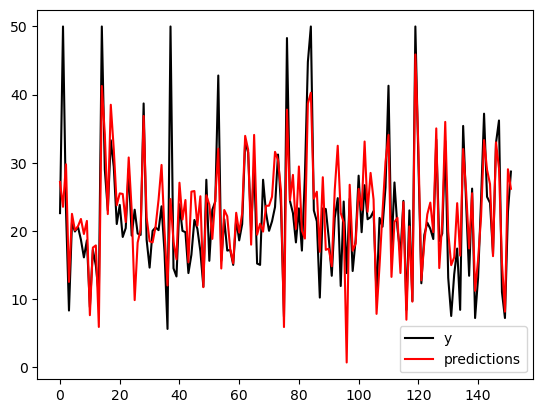

In [55]:
plt.plot(y_test.values,c="black",label="y")
plt.plot(predictions,c="red",label="predictions")
plt.legend()
plt.show()